In [1]:
import tweepy
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud as WordCloud
import pickle
import pandas as pd
import networkx as nx
import community

In [2]:
consumer_key = '1xDsdf65xVVks8fW6tFnIl9j2'
consumer_secret = 'smM8dpAnGFSJDN48PDja3qc5WdLkfoqTfx0ZIi6JFA9JiASZtj'
access_token = '1118074022309183488-aXZ0ERb4tYDp65FF8KVvM0oETb3HTv'
access_token_secret = 'sPBEcrIqtd1YkYrjFSKGkGMXM7Vxjk2xuqneWpj6bBZuD'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [3]:
def get_tweets(listOfTweets, keyword, numOfTweets):
    # Iterate through all tweets containing the given word, api search mode
    for tweet in tweepy.Cursor(api.search, q=keyword).items(numOfTweets):
        # Add tweets in this format
        dict_ = {'Screen Name': tweet.user.screen_name,
                'User Name': tweet.user.name,
                'Tweet Created At': tweet.created_at,
                'Tweet Text': tweet.text,
                'User Location':tweet.user.location,
                 'User id':tweet.user.id,
                'Tweet Coordinates': tweet.coordinates,
                'Retweet Count': tweet.retweet_count,
                'tweet id': tweet.id,
                'Retweeted': tweet.retweeted,
                'Phone Type': tweet.source,
                'Favorite Count': tweet.favorite_count,
                'Favorited': tweet.favorited,
                'Replied': tweet.in_reply_to_status_id_str
                }
        listOfTweets.append(dict_)   
    return listOfTweets

In [4]:
listofTweets=[]
get_tweets(listofTweets,'data science',50)

[{'Screen Name': 'ZyberGudari',
  'User Name': 'Goiko',
  'Tweet Created At': datetime.datetime(2019, 5, 7, 10, 3, 29),
  'Tweet Text': 'Checking out "AI-Generated Rap Songs" on Data Science Central: https://t.co/aUETT4bBlg',
  'User Location': '',
  'User id': 929050503853592576,
  'Tweet Coordinates': None,
  'Retweet Count': 0,
  'tweet id': 1125702685880197120,
  'Retweeted': False,
  'Phone Type': 'Twitter Web Client',
  'Favorite Count': 0,
  'Favorited': False,
  'Replied': None},
 {'Screen Name': 'poblacion_csic',
  'User Name': 'Población CSIC',
  'Tweet Created At': datetime.datetime(2019, 5, 7, 10, 3, 20),
  'Tweet Text': 'RT @FCBillari: Data Science, Society and Forecasts: the 2019 Alberto Dondena Lecture @DondenaCentre @Unibocconi by @alexvespi 14 May @ 5 PM…',
  'User Location': 'Madrid',
  'User id': 366661199,
  'Tweet Coordinates': None,
  'Retweet Count': 5,
  'tweet id': 1125702650002116608,
  'Retweeted': False,
  'Phone Type': 'Twitter Web Client',
  'Favorite Coun

In [5]:
no_of_nodes=5

In [6]:
#it does not work perfectly we changes occur to the primary node which i have taken 'GerardCoen'
ids1 = []
for i in range(1):
    for page in tweepy.Cursor(api.friends_ids, screen_name=listofTweets[2]['Screen Name'],count=no_of_nodes).pages(1):
        ids1.extend(page)
    print(len(ids1))

5


In [7]:
print(ids1)

[473315786, 3529991, 892438868, 122336037, 781583089667420161]


In [8]:
friends_screen_name1=[]
for i in ids1:
    user = api.get_user(i)
    friends_screen_name1.append(user.screen_name)

In [9]:
friends_screen_name1

['dataverseorg', 'kiru', 'tonirosati', 'benschp', 'LynnYarmey']

In [10]:
ids2 = []
for i in range(len(ids1)):
    for page in tweepy.Cursor(api.friends_ids, screen_name=friends_screen_name1[i],count=no_of_nodes).pages(1):
        ids2.extend(page)
    print(len(ids2))

5
10
15
20
25


In [11]:
friends_screen_name2=[]
for i in ids2:
    user = api.get_user(i)
    friends_screen_name2.append(user.screen_name)

In [12]:
friends_screen_name2

['SSHOpenCloud',
 'makedatacount',
 'poi_ki_lo_therm',
 'ausdataarchive',
 'SimonAdar',
 'brookeareid',
 'julsraemy',
 'maxplanckpress',
 'pbl_data',
 'patt_hub',
 'mstringer',
 'epicpeople_org',
 'tamaramhale',
 'workingux',
 'edhawan',
 'M_Kuipers',
 'WUR',
 'dobedani',
 'EliseTilborg',
 'JoinData_',
 'roughlock',
 'Fichulina',
 'HughShanahan',
 'JobsBoulderCO',
 'okeefekat']

In [13]:
ids3 = []
for i in range(len(ids2)):
    for page in tweepy.Cursor(api.friends_ids, screen_name=friends_screen_name2[i],count=no_of_nodes).pages(1):
        ids3.extend(page)
    print(len(ids3))

5
10
15
20
25
30
35
40
45


Rate limit reached. Sleeping for: 839


50
55
60
65
70
75
80
85
90
95
100
105
110
115
120


Rate limit reached. Sleeping for: 888


125


In [14]:
friends_screen_name3=[]
for i in ids3:
    user = api.get_user(i)
    friends_screen_name3.append(user.screen_name)

In [15]:
friends_screen_name3

['DH2019_NL',
 'PsyPost',
 'dighum_berlin',
 'NanetteRissler',
 'ps_tadler',
 'KristinaRiemer',
 'serahrono',
 'BCODMO',
 'lrztobiasa',
 'scholarlykitchn',
 'SWHeritage',
 'Payara_Fish',
 'kajasche',
 'WSSSPE',
 'mercecrosas',
 'DemographicRes',
 'datatas',
 'ADRIshanghai',
 'wragge',
 'NCIstoragecloud',
 'rctatman',
 'KirkDBorne',
 'choldgraf',
 'deevybee',
 'Magda_Skipper',
 'Ettore_Rizza',
 'nichtich',
 'kiru',
 'BonnieWildie',
 'JN_Rachele',
 'kiru',
 'amelie_courtin',
 '27point7',
 'VeridianDigiLib',
 'bencomp',
 'IPBES',
 'hparzinger',
 'eROSITA_SRG',
 'RingAScientist',
 'idw_online',
 'opi_pib',
 'kiru',
 'Umberto_Ecco',
 'christof77',
 'MattMoudi',
 'kiru',
 'bnkoper',
 'DH_Graz',
 'ForumAkad',
 'rilakkuma_gyr',
 'LeonYin',
 'mluxsf',
 'PrivacyProject',
 'higgis',
 'YoungChiAuthors',
 'DefenseOne',
 'naturaporia',
 'sidneyfussell',
 'ssnstudy',
 '_alialkhatib',
 'Futures_Design',
 'gleemie',
 'ACMSIGCAS',
 'ACM_Ethics',
 'fabiomoioli',
 'uxdiscuss',
 'EChesters',
 'nuxuk',
 'wh

In [16]:
user_nodes1=[]
for j in range(no_of_nodes):
    user_nodes1.append(listofTweets[2]['Screen Name'])

In [17]:
user_nodes1

['GerardCoen', 'GerardCoen', 'GerardCoen', 'GerardCoen', 'GerardCoen']

In [18]:
user_nodes2=[]
for i in range(len(friends_screen_name1)):
    for j in range(no_of_nodes):
        user_nodes2.append(friends_screen_name1[i])

In [19]:
user_nodes3=[]
for i in range(len(friends_screen_name2)):
    for j in range(no_of_nodes):
        user_nodes3.append(friends_screen_name2[i])

In [20]:
len(user_nodes1)

5

In [21]:
len(user_nodes2)

25

In [22]:
len(user_nodes3)

125

In [23]:
user_node=user_nodes1

In [24]:
len(user_node)

5

In [25]:
for i in range(len(user_nodes2)):
    user_node.append(user_nodes2[i])


In [26]:
for i in range(len(user_nodes3)):
    user_node.append(user_nodes3[i])

In [27]:
friend_node=friends_screen_name1

In [28]:
len(friends_screen_name1)

5

In [29]:
for i in range(len(friends_screen_name2)):
    friend_node.append(friends_screen_name2[i])

In [30]:
for i in range(len(friends_screen_name3)):
    friend_node.append(friends_screen_name3[i])

In [31]:
len(user_node)

155

In [32]:
len(friend_node)

155

In [33]:
import csv
with open("C:/Users/akhil/Downloads/nodes_final1.txt", 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(list(zip(user_node, friend_node)))


In [34]:
G_fb = nx.read_edgelist("C:/Users/akhil/Downloads/nodes_final1.txt", create_using = nx.Graph())

In [35]:
#Quick snapshot of the Network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 150
Number of edges: 149
Average degree:   1.9867


In [36]:
spring_pos = nx.spring_layout(G_fb)

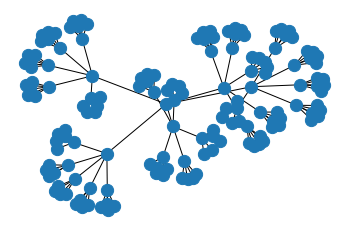

In [37]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 150)

In [38]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

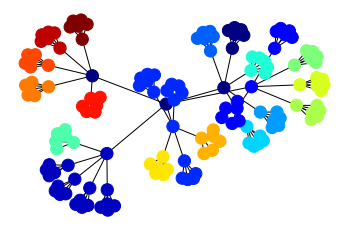

In [39]:
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 150, with_labels = False)

In [43]:
sizes=[x[1]*250 for x in G_fb.degree()]

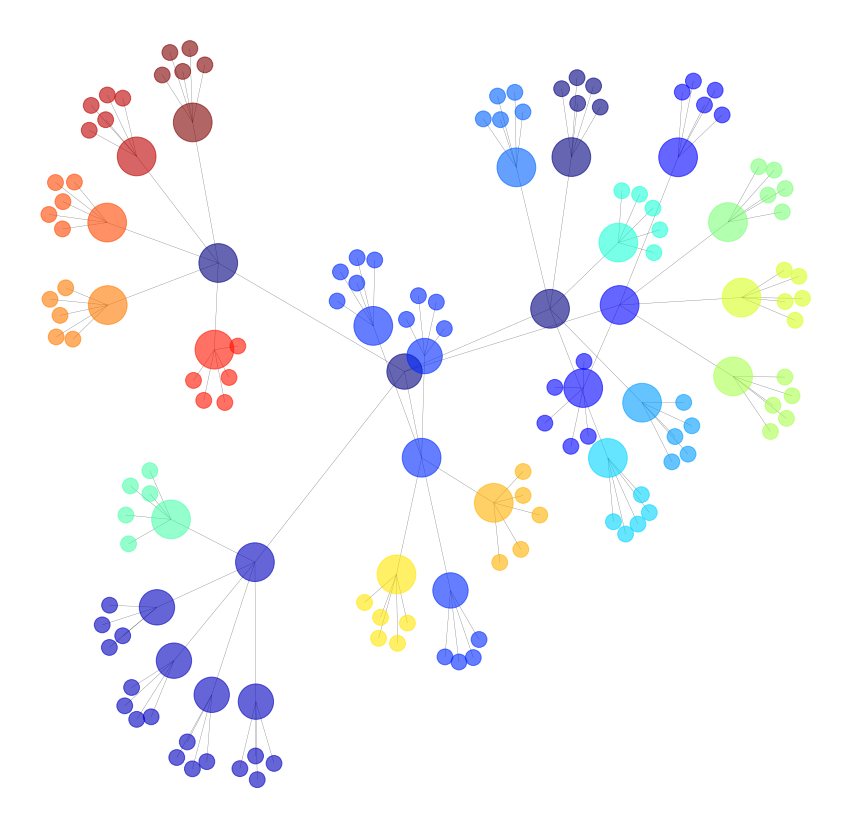

In [44]:
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=False,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/facebook_data/facebook_combined/keyplayer_in_cluster.png')

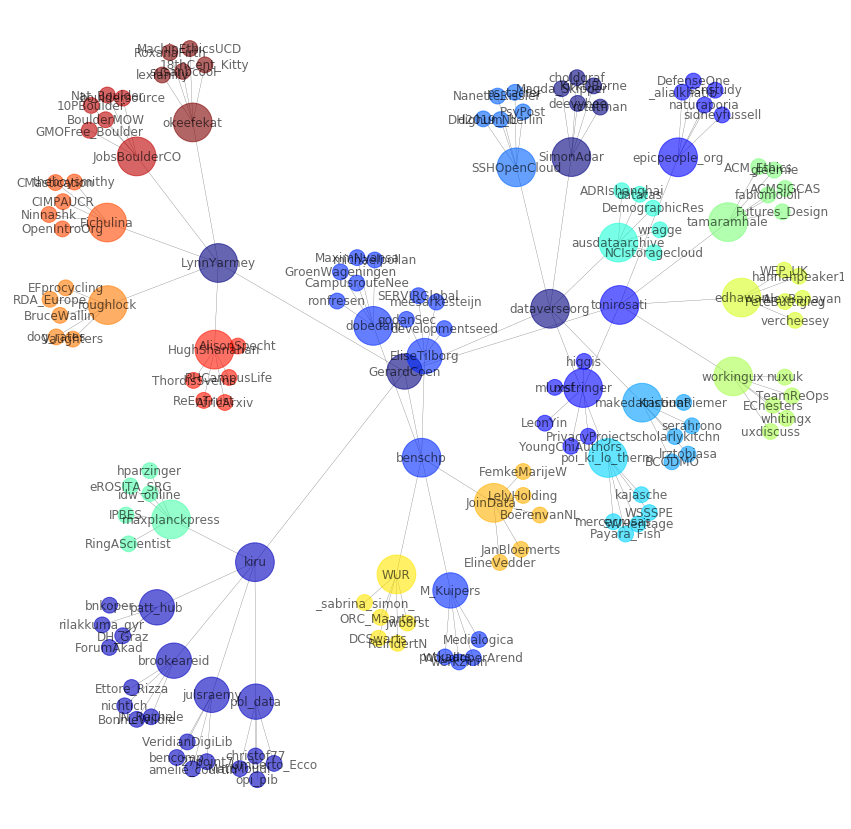

In [45]:
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=True,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/facebook_data/facebook_combined/keyplayer_in_cluster.png')

In [46]:
circle_pos=nx.circular_layout(G_fb)

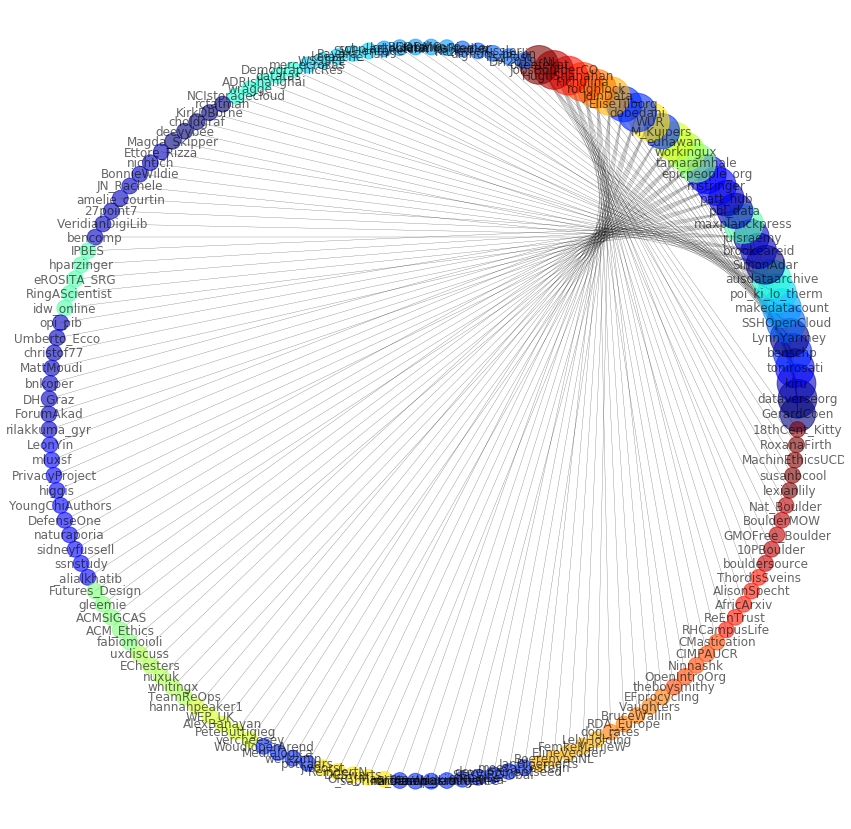

In [47]:
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = circle_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=True,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/facebook_data/facebook_combined/keyplayer_circluar.png')

In [76]:
z=G_fb.degree()

In [49]:
bc=nx.betweenness_centrality(G_fb)
betweenness=pd.DataFrame(list(bc.items()),columns=['Name','Cent'])
print(betweenness.sort_values('Cent',ascending=False).head(14))

            Name      Cent
0     GerardCoen  0.804825
3     tonirosati  0.356430
5     LynnYarmey  0.356430
1   dataverseorg  0.356430
4        benschp  0.335661
2           kiru  0.314529
25     JoinData_  0.066207
19     workingux  0.066207
20       edhawan  0.066207
22           WUR  0.066207
23      dobedani  0.066207
28  HughShanahan  0.066207
26     roughlock  0.066207
27     Fichulina  0.066207


In [72]:
x1=list(bc.keys())
y1=list(bc.values())

In [73]:
x=[]
y=[]
for i in range(10):
    x.append(x1[i])
    y.append(y1[i])
    

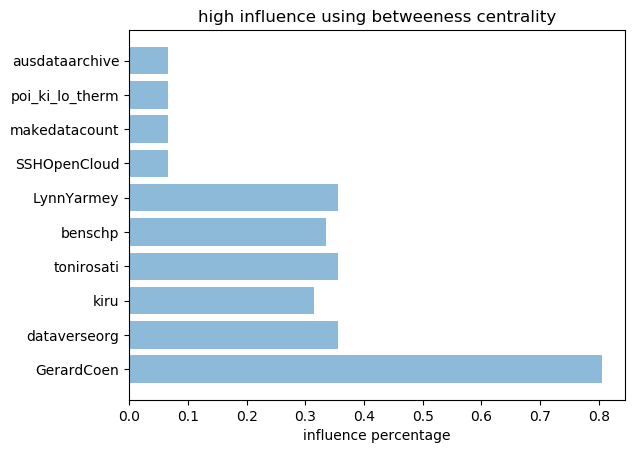

In [75]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = x
y_pos = np.arange(len(objects))
performance = y

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('influence percentage')
plt.title('high influence using betweeness centrality')

plt.show()